In [2]:
import matplotlib as plt
from matplotlib import style

In [4]:
style.use('dark_background')

In [ ]:
# Hilbert sphere |0> or |1>

In [20]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

backend = Aer.get_backend('qasm_simulator')

In [32]:
circuit = q.QuantumCircuit(2, 2)
circuit.x(1)
circuit.h(0)
for i in range(2):
    circuit.measure(i, i)
circuit.draw()

┌───┐┌─┐   
q_0: ┤ H ├┤M├───
     ├───┤└╥┘┌─┐
q_1: ┤ X ├─╫─┤M├
     └───┘ ║ └╥┘
c_0: ══════╩══╬═
              ║ 
c_1: ═════════╩═

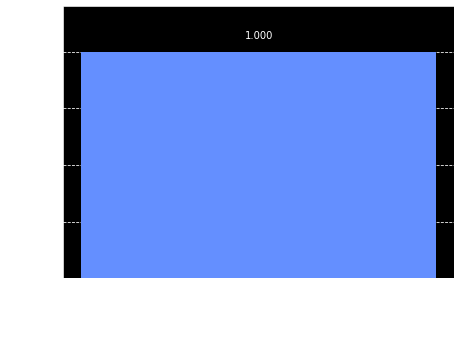

In [25]:
result = execute(circuit, backend).result()
counts = result.get_counts()
plot_histogram(counts)

In [33]:
n = 8
n_q = n
n_b = n
qc_output = q.QuantumCircuit(n_q,n_b)
for j in range(n):
    qc_output.measure(j,j)
qc_output.draw()

┌─┐                     
q_0: ┤M├─────────────────────
     └╥┘┌─┐                  
q_1: ─╫─┤M├──────────────────
      ║ └╥┘┌─┐               
q_2: ─╫──╫─┤M├───────────────
      ║  ║ └╥┘┌─┐            
q_3: ─╫──╫──╫─┤M├────────────
      ║  ║  ║ └╥┘┌─┐         
q_4: ─╫──╫──╫──╫─┤M├─────────
      ║  ║  ║  ║ └╥┘┌─┐      
q_5: ─╫──╫──╫──╫──╫─┤M├──────
      ║  ║  ║  ║  ║ └╥┘┌─┐   
q_6: ─╫──╫──╫──╫──╫──╫─┤M├───
      ║  ║  ║  ║  ║  ║ └╥┘┌─┐
q_7: ─╫──╫──╫──╫──╫──╫──╫─┤M├
      ║  ║  ║  ║  ║  ║  ║ └╥┘
c_0: ═╩══╬══╬══╬══╬══╬══╬══╬═
         ║  ║  ║  ║  ║  ║  ║ 
c_1: ════╩══╬══╬══╬══╬══╬══╬═
            ║  ║  ║  ║  ║  ║ 
c_2: ═══════╩══╬══╬══╬══╬══╬═
               ║  ║  ║  ║  ║ 
c_3: ══════════╩══╬══╬══╬══╬═
                  ║  ║  ║  ║ 
c_4: ═════════════╩══╬══╬══╬═
                     ║  ║  ║ 
c_5: ════════════════╩══╬══╬═
                        ║  ║ 
c_6: ═══════════════════╩══╬═
                           ║ 
c_7: ══════════════════════╩═

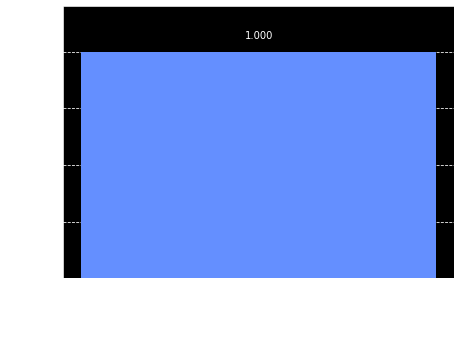

In [34]:
counts = execute(qc_output, backend).result().get_counts()
plot_histogram(counts)

In [52]:
qc_encode = QuantumCircuit(n)
qc_encode.x(2)
#qc_encode.h(4)
qc_encode.x(7)

qc_encode.draw()

q_0: ─────
          
q_1: ─────
     ┌───┐
q_2: ┤ X ├
     └───┘
q_3: ─────
          
q_4: ─────
          
q_5: ─────
          
q_6: ─────
     ┌───┐
q_7: ┤ X ├
     └───┘

In [53]:
qc = qc_encode + qc_output
qc.draw()

┌─┐                     
q_0: ─────┤M├─────────────────────
          └╥┘┌─┐                  
q_1: ──────╫─┤M├──────────────────
     ┌───┐ ║ └╥┘            ┌─┐   
q_2: ┤ X ├─╫──╫─────────────┤M├───
     └───┘ ║  ║ ┌─┐         └╥┘   
q_3: ──────╫──╫─┤M├──────────╫────
           ║  ║ └╥┘┌─┐       ║    
q_4: ──────╫──╫──╫─┤M├───────╫────
           ║  ║  ║ └╥┘┌─┐    ║    
q_5: ──────╫──╫──╫──╫─┤M├────╫────
           ║  ║  ║  ║ └╥┘┌─┐ ║    
q_6: ──────╫──╫──╫──╫──╫─┤M├─╫────
     ┌───┐ ║  ║  ║  ║  ║ └╥┘ ║ ┌─┐
q_7: ┤ X ├─╫──╫──╫──╫──╫──╫──╫─┤M├
     └───┘ ║  ║  ║  ║  ║  ║  ║ └╥┘
c_0: ══════╩══╬══╬══╬══╬══╬══╬══╬═
              ║  ║  ║  ║  ║  ║  ║ 
c_1: ═════════╩══╬══╬══╬══╬══╬══╬═
                 ║  ║  ║  ║  ║  ║ 
c_2: ════════════╬══╬══╬══╬══╩══╬═
                 ║  ║  ║  ║     ║ 
c_3: ════════════╩══╬══╬══╬═════╬═
                    ║  ║  ║     ║ 
c_4: ═══════════════╩══╬══╬═════╬═
                       ║  ║     ║ 
c_5: ══════════════════╩══╬═════╬═
                          ║     ║ 
c_6: ═════════════════════╩═════╬═
                                ║ 
c_7: ═══════════════════════════╩═

In [59]:
def run(qc):
    counts = execute(qc, backend).result().get_counts()
    return plot_histogram(counts)

In [48]:
# 0000000 + 1000000 = 1000000 

In [ ]:
#  C-not 

In [55]:
qc_cnot = QuantumCircuit(2)
qc_cnot.cx(0,1)
qc_cnot.draw()

q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘

In [71]:
qc = QuantumCircuit(2,2)
#qc.x(0)
qc.x(1)
qc.cx(0,1)
qc.measure(0,0)
qc.measure(1,1)
qc.draw()

┌─┐   
q_0: ───────■──┤M├───
     ┌───┐┌─┴─┐└╥┘┌─┐
q_1: ┤ X ├┤ X ├─╫─┤M├
     └───┘└───┘ ║ └╥┘
c_0: ═══════════╩══╬═
                   ║ 
c_1: ══════════════╩═

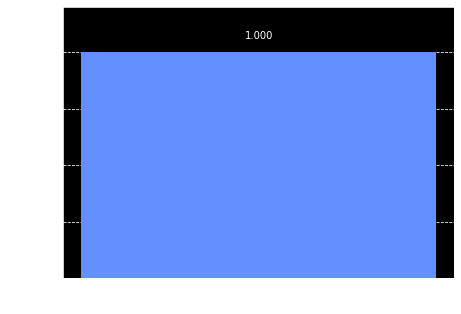

In [72]:
run(qc)

In [73]:
# half adder

In [84]:
qc_ha_v1 = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha_v1.x(0) # For a=0, remove this line. For a=1, leave it.
qc_ha_v1.x(1) # For b=0, remove this line. For b=1, leave it.
qc_ha_v1.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha_v1.cx(0,2)
qc_ha_v1.cx(1,2)
qc_ha_v1.barrier()
# extract outputs
qc_ha_v1.measure(2,0) # extract XOR value
qc_ha_v1.measure(3,1)

qc_ha_v1.draw()

┌───┐ ░            ░       
q_0: ┤ X ├─░───■────────░───────
     ├───┤ ░   │        ░       
q_1: ┤ X ├─░───┼────■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐ ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├─░─┤M├───
           ░ └───┘└───┘ ░ └╥┘┌─┐
q_3: ──────░────────────░──╫─┤M├
           ░            ░  ║ └╥┘
c_0: ══════════════════════╩══╬═
                              ║ 
c_1: ═════════════════════════╩═

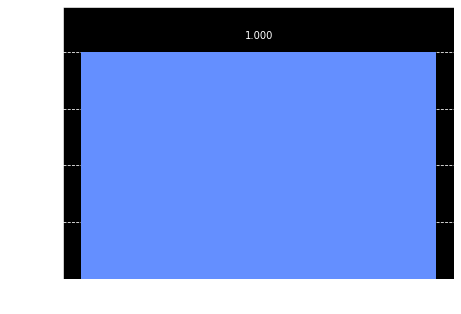

In [85]:
run(qc_ha_v1)

In [86]:
# problem is 1 + 1 = 0

In [87]:
qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha.x(0) # For a=0, remove the this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove the this line. For b=1, leave it.
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
# use ccx to write the AND of the inputs on qubit 3
qc_ha.ccx(0,1,3)
qc_ha.barrier()
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1) # extract AND value

qc_ha.draw()

┌───┐ ░                 ░       
q_0: ┤ X ├─░───■─────────■───░───────
     ├───┤ ░   │         │   ░       
q_1: ┤ X ├─░───┼────■────■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐  │   ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├──┼───░─┤M├───
           ░ └───┘└───┘┌─┴─┐ ░ └╥┘┌─┐
q_3: ──────░───────────┤ X ├─░──╫─┤M├
           ░           └───┘ ░  ║ └╥┘
c_0: ═══════════════════════════╩══╬═
                                   ║ 
c_1: ══════════════════════════════╩═

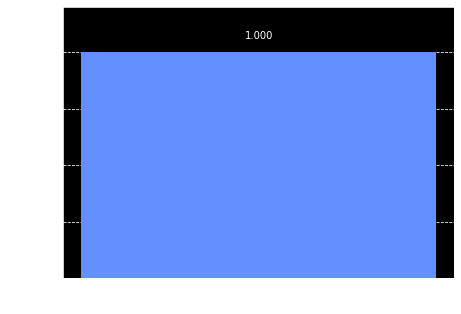

In [88]:
run(qc_ha)

In [102]:
qc_fa = QuantumCircuit(4,3)

# input bits
qc_fa.x(0) # For a=0, remove the this line. For a=1, leave it.
qc_fa.x(1) # For b=0, remove the this line. For b=1, leave it.
qc_fa.x(2) # For cin=0, remove the this line. For a=1, leave it.

qc_fa.barrier()

qc_fa.ccx(0,1,3)
qc_fa.cx(0,1)
qc_fa.ccx(1,2,3)
qc_fa.cx(1,2)
qc_fa.cx(0,1)

qc_fa.barrier()

qc_fa.measure(2, 0)
qc_fa.measure(1, 1)
qc_fa.measure(0, 2)

qc_fa.draw()

░                           ░       ┌─┐
q_0: ──────░───■────■──────────────■───░───────┤M├
     ┌───┐ ░   │  ┌─┴─┐          ┌─┴─┐ ░    ┌─┐└╥┘
q_1: ┤ X ├─░───■──┤ X ├──■────■──┤ X ├─░────┤M├─╫─
     ├───┤ ░   │  └───┘  │  ┌─┴─┐└───┘ ░ ┌─┐└╥┘ ║ 
q_2: ┤ X ├─░───┼─────────■──┤ X ├──────░─┤M├─╫──╫─
     └───┘ ░ ┌─┴─┐     ┌─┴─┐└───┘      ░ └╥┘ ║  ║ 
q_3: ──────░─┤ X ├─────┤ X ├───────────░──╫──╫──╫─
           ░ └───┘     └───┘           ░  ║  ║  ║ 
c_0: ═════════════════════════════════════╩══╬══╬═
                                             ║  ║ 
c_1: ════════════════════════════════════════╩══╬═
                                                ║ 
c_2: ═══════════════════════════════════════════╩═

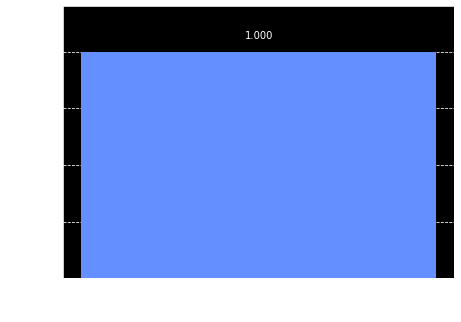

In [103]:
run(qc_fa)